# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.tail() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.04,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.04,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.04,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False
59298,0.75,/paris/France,Solution,NaN,30268,NaN,Enterprise,NaN,NaN,NaN,...,LGEKR,less than 3 months,0,0,0.000026,NaN,public facility,NaN,441,False


타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [4]:
df_test.tail() # 테스트 데이터 살펴보기

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
5266,13855,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
5267,7979,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,False
5268,12887,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,True
5269,17530,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False
5270,4330,0.25,/ Ongole / India,AS,NaN,23646,End Customer,Enterprise,NaN,NaN,...,LGEIL,NaN,0,0,NaN,NaN,NaN,NaN,4,True


테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

훈련용 데이터에 대해서 가지고 있는 정보를 확인하면 다음과 같다.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

### 결측치 확인

In [6]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

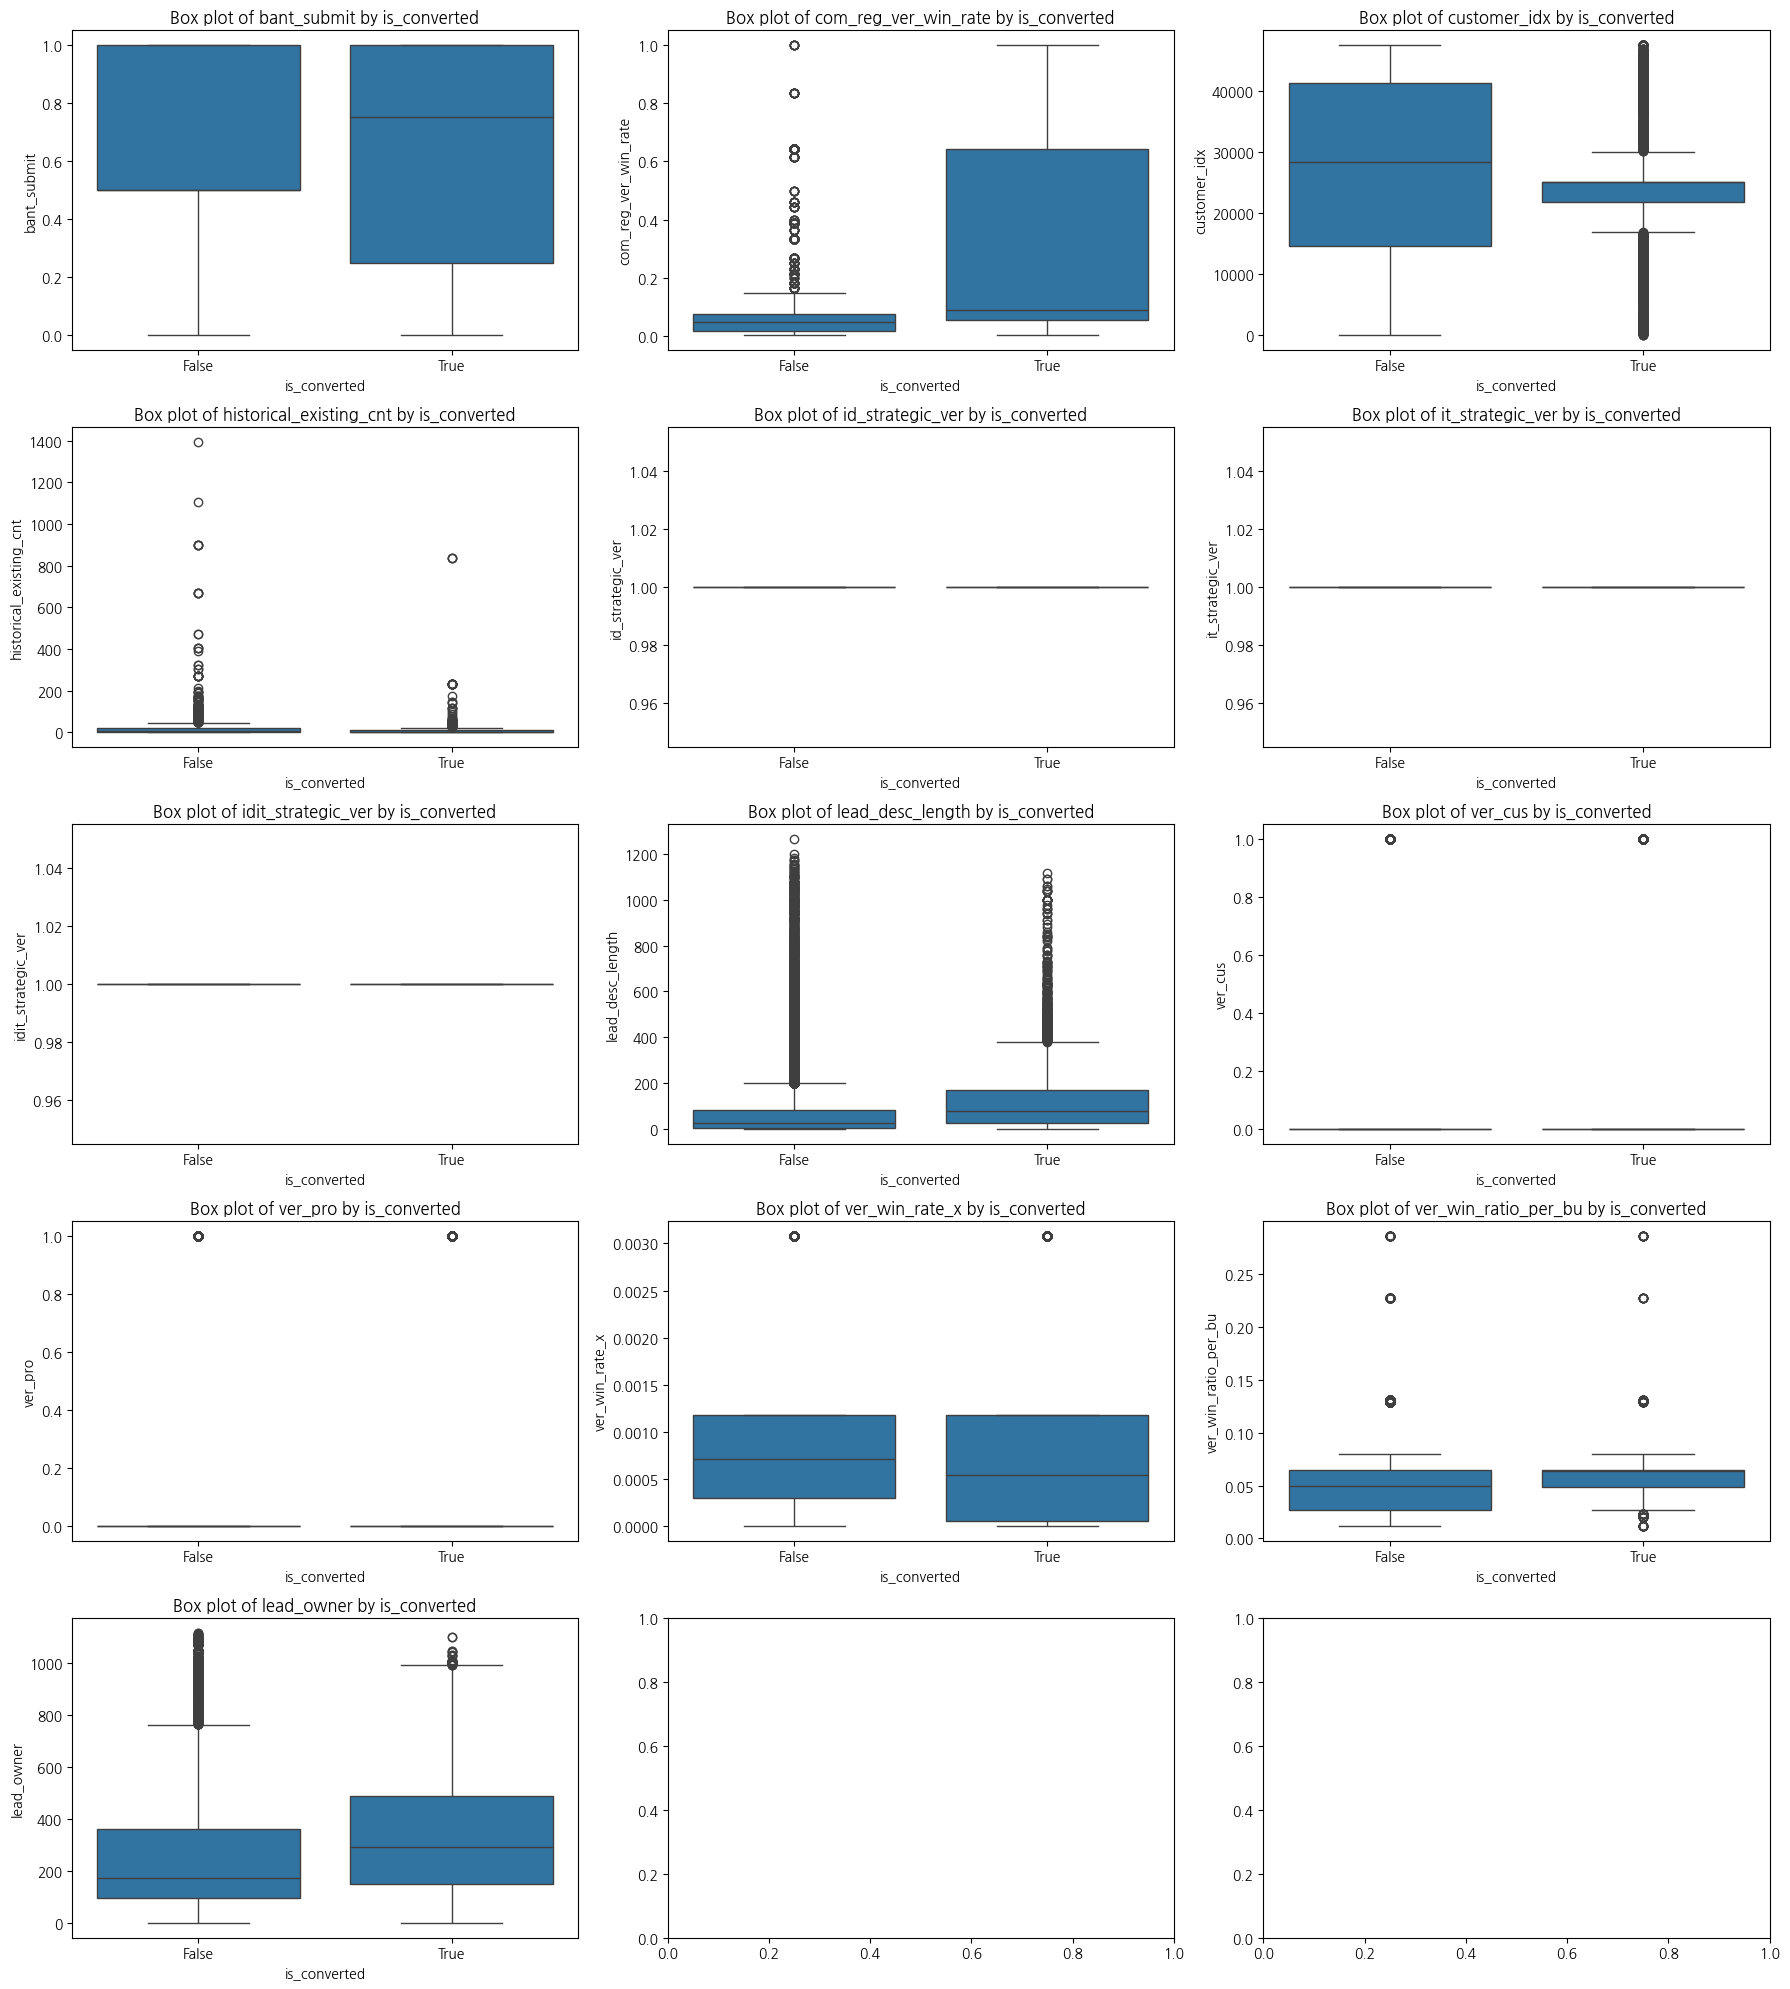

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()


In [8]:
# # IQR을 사용하여 이상치 제거
# Q1 = df_train[numeric_vars].quantile(0.25)
# Q3 = df_train[numeric_vars].quantile(0.75)
# IQR = Q3 - Q1

# df_train_clean = df_train[~((df_train[numeric_vars] < (Q1 - 5 * IQR)) | (df_train[numeric_vars] > (Q3 + 5 * IQR))).any(axis=1)]

이상치 대략적으로 잘라낸것으로 세부적으로 재판단하여 제거하는 방향으로 할 예정

## 2. 데이터 전처리

### 각 변수별 확인

일단은 크게 처리할만한 부분만 처리하면서 진행해보았음

#### 1. bant_submit

MQL 구성 요소들 중  
[1] Budget(예산)  
[2] Title(고객의 직책/직급)  
[3] Needs(요구사항)  
[4] Timeline(희망 납기일)  
4가지 항목에 대해서 작성된 값의 비율

In [9]:
df_train['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

#### 2. customer_country

고객의 국적

In [10]:
# # 두 변수 간에 값이 같은지 비교하여 차이가 나는 행을 식별합니다.
# df_train['diff_country'] = df_train['customer_country'] == df_train['customer_country.1']

# # 결과 확인
# # print(df_train['diff_country'])
# df_train['diff_country'].value_counts()

In [11]:
df_train['customer_country'].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

In [12]:
import numpy as np

def process_customer_country(df):
    for i, entry in enumerate(df["customer_country"]):
        if isinstance(entry, str):
            last_slash_index = entry.rfind('/')
            if last_slash_index != -1 and last_slash_index != len(entry) - 1:
                df.at[i, "customer_country"] = entry[last_slash_index + 1:].strip()
            elif last_slash_index == len(entry) - 1:
                df.at[i, "customer_country"] = np.nan
            else:
                last_comma_index = entry.rfind(',')
                if last_comma_index != -1 and last_comma_index != len(entry) - 1:
                    df.at[i, "customer_country"] = entry[last_comma_index + 1:].strip()
                else:
                    df.at[i, "customer_country"] = np.nan
    return df

df_train = process_customer_country(df_train)
df_test = process_customer_country(df_test)
# print(df_train["customer_country"])


In [13]:
df_train['customer_country'].value_counts()

customer_country
India                 16849
Brazil                 8739
United States          3810
Philippines            2569
Mexico                 2300
                      ...  
FL 33716                  1
CA 95618                  1
New Hampshire             1
GA 31405                  1
Dominican republic        1
Name: count, Length: 322, dtype: int64

#### 3. business_unit

MQL 요청 상품에 대응되는 사업부

In [14]:
df_train['business_unit'].value_counts()

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [15]:
cm_data = df_train[df_train['business_unit'] == 'CM']
print(cm_data)

       bant_submit customer_country business_unit  com_reg_ver_win_rate  \
52519          0.5           Brazil            CM                   NaN   
52520          0.5           Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   
52520         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   
52520               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   
52520               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN

business_unit의 값아 CM 데이터를 제거하기에는 타겟변수(is_converted)에서 모두 False라는 값을 도출해 냄과 동시에  
다른 변수에서 NaN 값으로 대부분 채워져있는것을 보면 CM일수록 is_converted일 가능성이 높다고 판단  
따라서 drop하지않고 그대로 유지(물론 test 데이터에는 CM값이 있지는 않음)

#### 4. com_reg_ver_win_rate

[1] Vertical Level 1  
[2] business unit  
[3] region  
3가지 값을 기준으로 oppty 비율을 계산

In [16]:
df_train['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
            ... 
0.363636      13
0.444444      12
0.400000      12
1.000000      10
0.200000       5
Name: count, Length: 80, dtype: int64

com_reg_ver_win_rate의 값의 분포를 is_converted에 따라 분류하여 박스플롯으로 확인

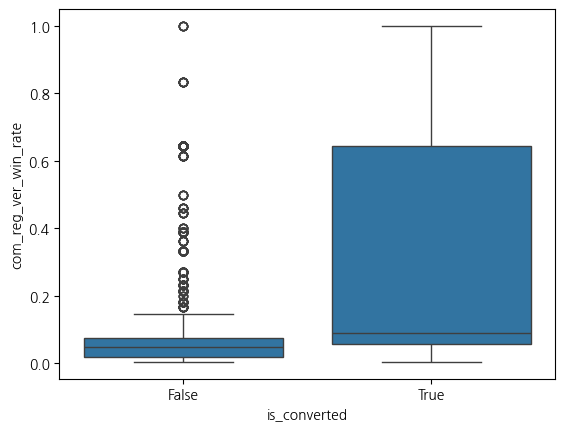

In [17]:
sns.boxplot(x='is_converted', y='com_reg_ver_win_rate', data=df_train)

plt.show()

business_unit별로 com_reg_ver_win_rate 값의 분포를 관찰

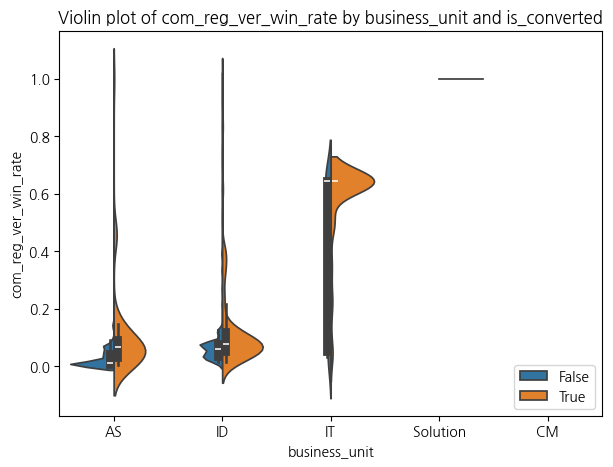

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.violinplot(x='business_unit', y='com_reg_ver_win_rate', hue='is_converted', data=df_train, split=True)
plt.title('Violin plot of com_reg_ver_win_rate by business_unit and is_converted')
plt.xlabel('business_unit')
plt.ylabel('com_reg_ver_win_rate')
plt.legend(loc='lower right')  # 범례 위치를 우측 하단으로 변경
plt.show()

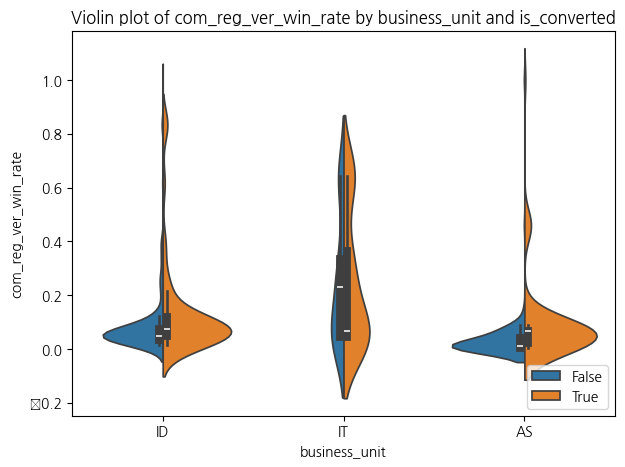

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.violinplot(x='business_unit', y='com_reg_ver_win_rate', hue='is_converted', data=df_test, split=True)
plt.title('Violin plot of com_reg_ver_win_rate by business_unit and is_converted')
plt.xlabel('business_unit')
plt.ylabel('com_reg_ver_win_rate')
plt.legend(loc='lower right')  # 범례 위치를 우측 하단으로 변경
plt.show()

분포형태가 달라짐 특히 IT부분에서 분포형태가 크게 차이남    
 -> com_reg_ver_win_rate 와 business_unit 에서 관계성이 유의미하다고 볼수 X

#### 5. customer_idx

고객의 회사명

In [20]:
df_train['customer_idx'].value_counts()

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
         ... 
39487       1
41241       1
39422       1
22515       1
30268       1
Name: count, Length: 35112, dtype: int64

#### 6. customer_type

고객 유형

In [21]:
df_train['customer_type'].value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [22]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Home Owner': 'Homeowner',
    'HVAC Engineer': 'Engineer',
    'Manager / Director' : 'Manager/Director',
    'Administrator': 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Technical Assistant': 'Technician',
    'Installer': 'Installer/Contractor'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Home Owner': 'Homeowner',
    'HVAC Engineer': 'Engineer',
    'Manager / Director' : 'Manager/Director',
    'Administrator': 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Technical Assistant': 'Technician',
    'Installer': 'Installer/Contractor'
})

In [23]:
print(df_train['customer_type'].value_counts())

customer_type
End-Customer                  10643
Specifier/Influencer           2568
Channel Partner                1368
Service Partner                 349
Solution Eco-Partner            146
Installer/Contractor             57
Engineer                         43
Corporate                        31
Other                            20
Architect/Consultant             20
Technician                       17
Developer                        17
Homeowner                        15
Manager/Director                  9
End-user                          9
Software/Solution Provider        8
Dealer/Distributor                6
Reseller                          5
Interior Designer                 5
System Integrator                 2
Name: count, dtype: int64


In [24]:
print(df_test['customer_type'].value_counts())

customer_type
End-Customer            2454
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Developer                  1
Name: count, dtype: int64


#### 7. enterprise

[1] Global 기업인지  
[2] Small/Medium 규모의 기업인지

In [25]:
df_train['enterprise'].value_counts()

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

#### 8. historical_existing_cnt

이전에 Converted(영업 전환) 되었던 횟수

In [26]:
df_train['historical_existing_cnt'].value_counts()

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
          ... 
404.0        1
145.0        1
1394.0       1
199.0        1
108.0        1
Name: count, Length: 136, dtype: int64

#### 9. id_strategic_ver

(도메인 지식) 특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 ID 사업부에 대한 변수

In [27]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
1.0    3444
Name: count, dtype: int64

business_unit의 값을 확인하였을때  
ID 사업부의 갯수는 25563개 비해 id_strategic_ver의 1의 값이 3444개인것을 보면  
ID 사업부 중에서도 특별히 가중치를 주는 이유가 존재할것으로 보임

In [28]:
# 누락된 값을 0으로 채우기
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_test['id_strategic_ver'].fillna(0, inplace=True)

In [29]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
0.0    55855
1.0     3444
Name: count, dtype: int64

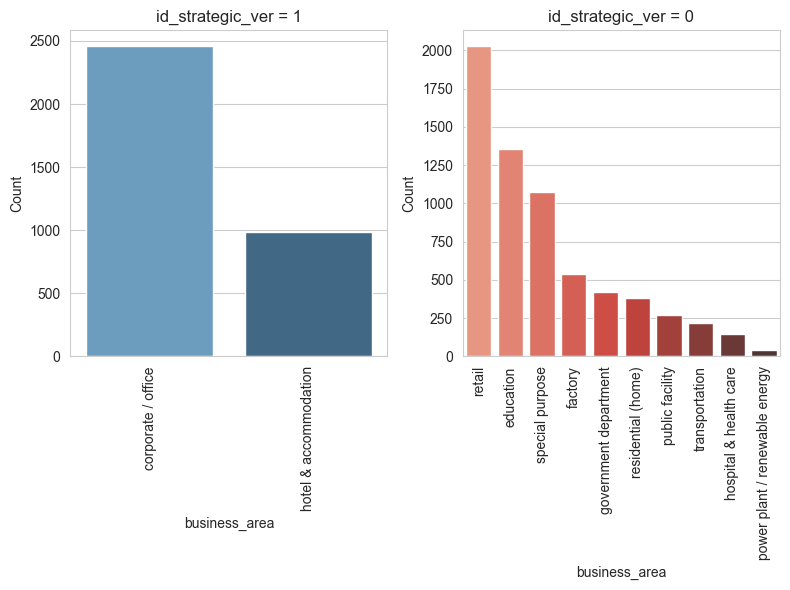

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'ID']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['id_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['id_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


특정 사업 영역(Vertical Level1) -> business_area(고객의 사업 영역) 와 관련이 있음을 그래프를 통해 확인할수 있음

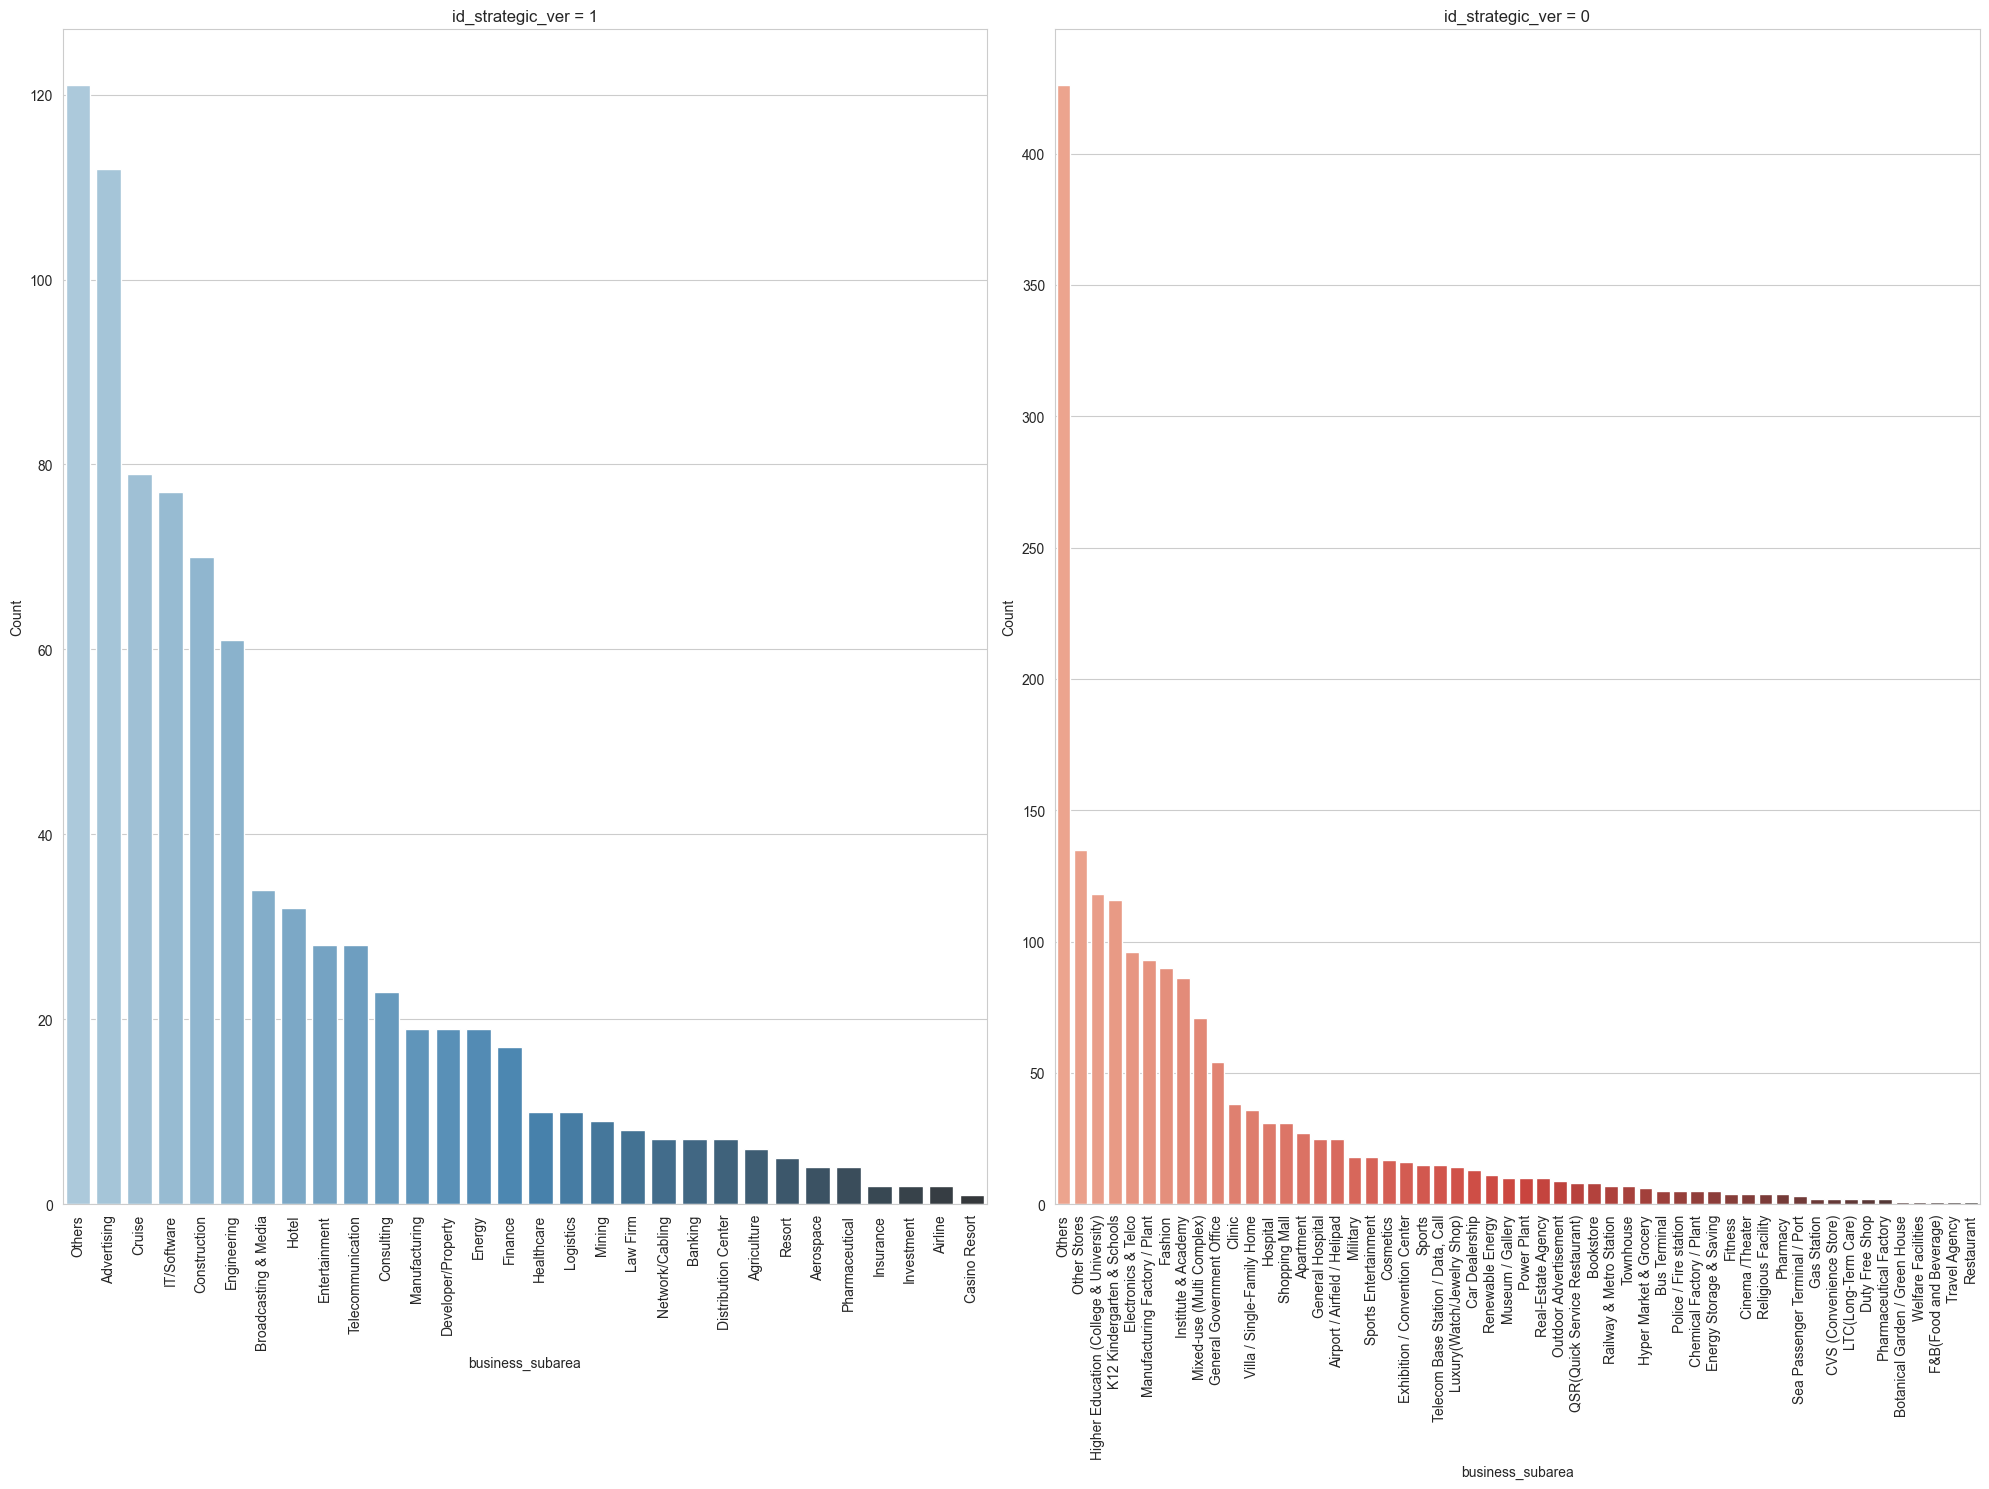

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_subarea'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_subarea'].value_counts()

# 그래프
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [32]:
# count_id_strategic_0 와 count_id_strategic_1 사이의 차이를 계산
difference = count_id_strategic_0.subtract(count_id_strategic_1, fill_value=0)

# 차이를 출력
print(difference)

business_subarea
Advertising                    -112.0
Aerospace                        -4.0
Agriculture                      -6.0
Airline                          -2.0
Airport / Airfield / Helipad     25.0
                                ...  
Telecommunication               -28.0
Townhouse                         7.0
Travel Agency                     1.0
Villa / Single-Family Home       36.0
Welfare Facilities                1.0
Name: count, Length: 83, dtype: float64


business_subarea (고객의 세부 사업 영역) 부분에서는 유의미한 차이가 보이지않음

id_strategic_ver 는 결국 business_unit이 'ID'이면서,  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 10. it_strategic_ver

(도메인 지식)   
특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 It 사업부에 대한 변수

In [33]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
1.0    1121
Name: count, dtype: int64

In [34]:
# 누락된 값을 0으로 채우기
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_test['it_strategic_ver'].fillna(0, inplace=True)

In [35]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
0.0    58178
1.0     1121
Name: count, dtype: int64

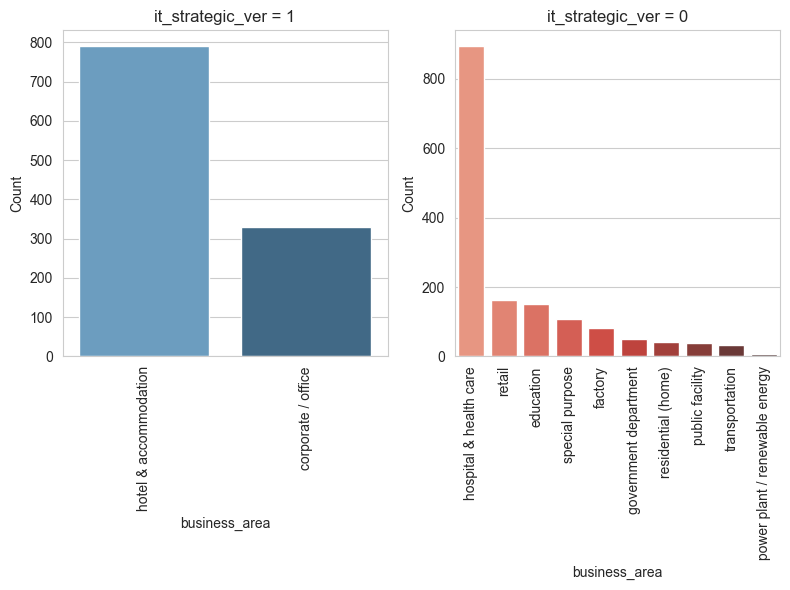

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'IT']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['it_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['it_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('it_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('it_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


it_strategic_ver 는 business_unit이 'It'이면서,  
고객의 사업영역은 ID 사업부에서의 가중치와 동일하게  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 11. idit_strategic_ver

Id_strategic_ver이나 it_strategic_ver 값 중   
하나라도 1의 값을 가지면 1 값으로 표현

In [37]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [38]:
# 누락된 값을 0으로 채우기
df_train['idit_strategic_ver'].fillna(0, inplace=True)
df_test['idit_strategic_ver'].fillna(0, inplace=True)

In [39]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
0.0    54734
1.0     4565
Name: count, dtype: int64

#### 12. customer_job

고객의 직업군

In [40]:
df_train['customer_job'].value_counts()

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64

#### 13. lead_desc_length

고객이 작성한 Lead Descriptoin 텍스트 총 길이

In [41]:
df_train['lead_desc_length'].value_counts()

lead_desc_length
3      10378
14      3180
2        934
10       891
4        884
       ...  
824        1
559        1
676        1
907        1
726        1
Name: count, Length: 909, dtype: int64

#### 14. inquiry_type

고객의 문의 유형

In [42]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                 

In [43]:
# 'inquiry_type' 열의 같은내용에 대해 일관된 값으로 변환
## Ctrl + Shift + [ : 현재 영역 접기
df_train['inquiry_type'] = df_train['inquiry_type'].replace({
    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Product Information': 'Product Information',
    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Trainings': 'Usage or Technical Consultation',
    'Services': 'Services',
    'Sales Inquiry': 'Sales Inquiry',
    'Etc.': 'Other',
    'Technical Support': 'Usage or Technical Consultation',
    'Request for Partnership': 'Request for Partnership',
    'Request a Demo': 'Usage or Technical Consultation',
    'Request for Distributorship': 'Request for Partnership',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'Event Inquiry': 'Services',
    'OEM/ODM Request': 'Request for Partnership',
    'Hospital TV': 'Quotation or Purchase Consultation',
    'EDUCATIONAL EQUIPMENTS': 'Product Information',
    'Digital platform': 'Product Information',
    'TV interactive': 'Product Information',
    'teach': 'Usage or Technical Consultation',
    'Display Textbook and photos': 'Product Information',
    'High inch 86 / 98 or 110': 'Product Information',
    'window facing product': 'Product Information',
    'IDB': 'Product Information',
    'Not specified': 'Other',
    'Evento_SdelEstero': 'Other',
    'first Info and pricing': 'Quotation or Purchase Consultation',
    'sales': 'Sales Inquiry',
    'technical': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'other_': 'Other',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo': 'Quotation or Purchase Consultation',
    'Hola me pueden cotizar 19 pantallas interactivas de 100 pulgadas entregadas en Guayaquil -Ecuador.': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick': 'Quotation or Purchase Consultation',
    'Intégrateur historique du George V': 'Product Information',
    'Vui lòng báo giá giúp mình sản phẩm đo thân nhân để đo nhiệt độ cơ thể trong điều kiện phòng thí nghiệm': 'Quotation or Purchase Consultation',
    'Probeam precio': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Hotel TV products': 'Quotation or Purchase Consultation',
    'Pantallas Interactivas para Clinicas': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:': 'Quotation or Purchase Consultation',
    'LED Signage': 'Product Information',
    'Standalone': 'Product Information',
    'Video Wall': 'Product Information',
    'Toi muon tim hieu thong tin ky thuat, gia ca cua san pham Smart Board SBM-700-70': 'Quotation or Purchase Consultation',
    'tôi cần tham khảo giá và giải pháp từ LG': 'Quotation or Purchase Consultation',
    'Preciso de um monitor médico para radiografia de alta resolução e softwares dedicados': 'Quotation or Purchase Consultation',
    'VRF': 'Product Information',
    'Sales inquiry': 'Sales Inquiry',
    'i want to know the details about it': 'Other',
    'Needs': 'Other',
    'AIO': 'Product Information',
    'One Quick:Flex': 'Product Information',
    'Media Inquiry': 'Other',
    'Purchase': 'Quotation or Purchase Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'Customer Suggestions': 'Other',
    '(Select ID_Needs)': 'Other',
    'for school': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Evento_SdelEstero': 'Other',
    'ETC.': 'Other',
    'IDB': 'Product Information',
    'others': 'Other',
    'quotation_': 'Quotation or Purchase Consultation',
    'Window facing product': 'Product Information',
    'display product': 'Product Information',
    'first Info and pricing': 'Quotation or Purchase Consultation',
    'Others' : 'Other',
    'other': 'Other',
    'Vui lòng báo giá giúp mình sản phẩm đo thân nhiệt Xin cảm ơn': 'Quotation or Purchase Consultation',
    'Toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung': 'Quotation or Purchase Consultation',
    'estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo.': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:': 'Quotation or Purchase Consultation',
    'Preciso de um monitor médico para radiografia convencional e tomogrtafia.': 'Quotation or Purchase Consultation'
})
df_test['inquiry_type'] = df_test['inquiry_type'].replace({
    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Product Information': 'Product Information',
    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Trainings': 'Usage or Technical Consultation',
    'Services': 'Services',
    'Sales Inquiry': 'Sales Inquiry',
    'Etc.': 'Other',
    'Technical Support': 'Usage or Technical Consultation',
    'Request for Partnership': 'Request for Partnership',
    'Request a Demo': 'Usage or Technical Consultation',
    'Request for Distributorship': 'Request for Partnership',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'Event Inquiry': 'Services',
    'OEM/ODM Request': 'Request for Partnership',
    'Hospital TV': 'Quotation or Purchase Consultation',
    'EDUCATIONAL EQUIPMENTS': 'Product Information',
    'Digital platform': 'Product Information',
    'TV interactive': 'Product Information',
    'teach': 'Usage or Technical Consultation',
    'Display Textbook and photos': 'Product Information',
    'High inch 86 / 98 or 110': 'Product Information',
    'window facing product': 'Product Information',
    'IDB': 'Product Information',
    'Not specified': 'Other',
    'Evento_SdelEstero': 'Other',
    'first Info and pricing': 'Quotation or Purchase Consultation',
    'sales': 'Sales Inquiry',
    'technical': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'other_': 'Other',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo': 'Quotation or Purchase Consultation',
    'Hola me pueden cotizar 19 pantallas interactivas de 100 pulgadas entregadas en Guayaquil -Ecuador.': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick': 'Quotation or Purchase Consultation',
    'Intégrateur historique du George V': 'Product Information',
    'Vui lòng báo giá giúp mình sản phẩm đo thân nhân để đo nhiệt độ cơ thể trong điều kiện phòng thí nghiệm': 'Quotation or Purchase Consultation',
    'Probeam precio': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Hotel TV products': 'Quotation or Purchase Consultation',
    'Pantallas Interactivas para Clinicas': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:': 'Quotation or Purchase Consultation',
    'LED Signage': 'Product Information',
    'Standalone': 'Product Information',
    'Video Wall': 'Product Information',
    'Toi muon tim hieu thong tin ky thuat, gia ca cua san pham Smart Board SBM-700-70': 'Quotation or Purchase Consultation',
    'tôi cần tham khảo giá và giải pháp từ LG': 'Quotation or Purchase Consultation',
    'Preciso de um monitor médico para radiografia de alta resolução e softwares dedicados': 'Quotation or Purchase Consultation',
    'VRF': 'Product Information',
    'Sales inquiry': 'Sales Inquiry',
    'i want to know the details about it': 'Other',
    'Needs': 'Other',
    'AIO': 'Product Information',
    'One Quick:Flex': 'Product Information',
    'Media Inquiry': 'Other',
    'Purchase': 'Quotation or Purchase Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'Customer Suggestions': 'Other',
    '(Select ID_Needs)': 'Other',
    'for school': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Evento_SdelEstero': 'Other',
    'ETC.': 'Other',
    'IDB': 'Product Information',
    'others': 'Other',
    'quotation_': 'Quotation or Purchase Consultation',
    'Window facing product': 'Product Information',
    'display product': 'Product Information',
    'first Info and pricing': 'Quotation or Purchase Consultation',
    'Others' : 'Other',
    'other': 'Other',
    'Vui lòng báo giá giúp mình sản phẩm đo thân nhiệt Xin cảm ơn': 'Quotation or Purchase Consultation',
    'Toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung': 'Quotation or Purchase Consultation',
    'estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo.': 'Quotation or Purchase Consultation',
    'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:': 'Quotation or Purchase Consultation',
    'Preciso de um monitor médico para radiografia convencional e tomogrtafia.': 'Quotation or Purchase Consultation'
})


In [44]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                    42400
Sales Inquiry                                                                                         10081
Usage or Technical Consultation                                                                        2397
Other                                                                                                  1420
Product Information                                                                                    1262
Services                                                                                                420
Request for Partnership                                                                                 377
Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:         1
Name: count, dtype: int64

In [45]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        217
Other                                  128
Product Information                     68
Request for Partnership                 67
Services                                34
Name: count, dtype: int64

#### 15. product_category

요청 제품 카테고리

In [46]:
df_train['product_category'].value_counts()

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 357, dtype: int64

In [47]:
df_train['product_category'] = df_train['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',  
    'vrf': 'Air Conditioner',  
    'multi-split': 'Air Conditioner',  
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',  
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar', 
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',  
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})
df_test['product_category'] = df_test['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',  
    'vrf': 'Air Conditioner',  
    'multi-split': 'Air Conditioner',  
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',  
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar', 
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',  
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})

# 변환된 'product_category' 열의 값 분포 확인
print(df_train['product_category'].value_counts())


product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3604
Heating and Ventilation     2273
Medical Display             1011
Solar                         75
Energy Storage                 2
Name: count, dtype: int64


In [48]:
df_train['product_category'] = df_train['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'Solar' : 'Others',                         
    'Energy Storage': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


In [49]:
print(df_test['product_category'].value_counts())

product_category
Air Conditioner            1449
Digital Signage            1212
Others                      282
TV and Display              236
Heating and Ventilation     197
Medical Display              32
ess                           4
notebook                      1
Name: count, dtype: int64


In [50]:
df_test['product_category'] = df_test['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'ess' : 'Others',                         
    'notebook': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


#### 16. product_subcategory

요청 제품 하위 카테고리

In [51]:
df_train['product_subcategory'].value_counts()

product_subcategory
All Medical Displays         446
Interactive Digital Board    417
TR3BF Series                 374
Transparent OLED Signage     288
Diagnostic Monitors          284
                            ... 
49VL5J                         1
Versatile                      1
UM3F Series                    1
All Monitors &PCs              1
EVR                            1
Name: count, Length: 330, dtype: int64

In [52]:
df_test['product_subcategory'].value_counts()

product_subcategory
Digital Signage or Commercial TVs                                                                       86
Transparent LED Film                                                                                    52
TR3DJ Series                                                                                            32
Interactive Digital Board                                                                               29
Curvable OLED Signage                                                                                   24
                                                                                                        ..
Energy storage, Home automation, PV modules, Solar & water, Solar heating and cooling, hot water, po     1
IDB                                                                                                      1
Curved Series                                                                                            1
LV35A Series     

#### 17. product_modelname

요청 제품 모델명

In [53]:
df_train['product_modelname'].value_counts()

product_modelname
UltraFine Ergo(32UN880)    523
28MQ780                    479
All Medical Displays       350
43HT3WJ                    290
55CT5WJ                    261
                          ... 
55EJ5E-B                     1
43UT662M (MEA)               1
43UM3DG                      1
32LT340C (EU)                1
55US660H (SCA)               1
Name: count, Length: 665, dtype: int64

#### 18. customer_country.1

담당 자사 법인명 기반의 지역 정보(대륙)

In [54]:
df_train['customer_country.1'].value_counts()

customer_country.1
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

In [55]:
import numpy as np

def process_customer_country(df):
    for i, entry in enumerate(df["customer_country.1"]):
        if isinstance(entry, str):
            last_slash_index = entry.rfind('/')
            if last_slash_index != -1 and last_slash_index != len(entry) - 1:
                df.at[i, "customer_country.1"] = entry[last_slash_index + 1:].strip()
            elif last_slash_index == len(entry) - 1:
                df.at[i, "customer_country.1"] = np.nan
            else:
                last_comma_index = entry.rfind(',')
                if last_comma_index != -1 and last_comma_index != len(entry) - 1:
                    df.at[i, "customer_country.1"] = entry[last_comma_index + 1:].strip()
                else:
                    df.at[i, "customer_country.1"] = np.nan
    return df

df_train = process_customer_country(df_train)
df_test = process_customer_country(df_test)

print(df_train["customer_country.1"])


0        Philippines
1        Philippines
2              India
3              India
4              India
            ...     
59294         Poland
59295       Colombia
59296           Peru
59297           Peru
59298         France
Name: customer_country.1, Length: 59299, dtype: object


In [56]:
df_train['customer_country.1'].value_counts()

customer_country.1
India                 16849
Brazil                 8739
United States          3810
Philippines            2569
Mexico                 2300
                      ...  
FL 33716                  1
CA 95618                  1
New Hampshire             1
GA 31405                  1
Dominican republic        1
Name: count, Length: 322, dtype: int64

#### 19. customer_position

고객의 회사 직책

In [57]:
df_train['customer_position'].value_counts()

customer_position
none                      19680
manager                    8217
ceo/founder                7984
other                      6499
director                   4843
                          ...  
chairman                      1
pgt physics                   1
education professional        1
chemistry teacher             1
radiology professional        1
Name: count, Length: 117, dtype: int64

In [58]:
df_train['customer_position'] = df_train['customer_position'].replace({
    'other': 'others',
    'vicepresident': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'av management': 'manager',
    'consultant': 'consulting',
    'bulgaria': 'others',
    'founder': 'ceo/founder',
    'unpaid': 'others',
    'commercial consultant': 'consulting',
    'architect/consultant': 'consulting',
    'architecture/consult': 'consulting',
    'decision influencer': 'decision-influencer',
    'business unit director': 'director',
    'co-founder': 'ceo/founder',
    'product management': 'manager',
    'business unit director': 'director',
    'leadership/executive office/owner': 'c-level executive',
    'ceo/fundador': 'ceo/founder',
    'vp': 'vice president',
    'no influence': 'none',
    'not applicable': 'none',
    'lider de desarrollo': 'director',
    'customer': 'end-user',
    'commercial end-user': 'end-user',
    'vp': 'vice president',
    'exhibitiontv': 'exhibition',
    'chairman': 'ceo/founder',
    'president': 'ceo/founder',
    'decision maker': 'decision-maker',
    'government': 'others',
    'operations': 'manager',
    'other - please specify - cedia association': 'others',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'chief executive officer': 'c-level executive',
    'business partner': 'partner',
    'medical device manufacturer': 'manufacturer',
    'quantitative aptitude faculty': 'manufacturer',
    'radiology professional': 'hospital',
    'pathologist': 'hospital',
    'surgery professional': 'hospital',
    'medical imaging specialist': 'hospital',
    'the big boss': 'ceo/founder',
    'software /solution provider': 'engineering',
    'system integrator': 'engineering',
    'business development': 'business development/sales',
    'cargo': 'distributor',
    'the big boss': 'ceo/founder',
    'market intelligence/research': 'associate/analyst',
    'associate professor': 'associate/analyst',
    'associate professor in electronics engg': 'associate/analyst',
    'research': 'associate/analyst',
    'assistant professor of enlish': 'assistant professor',
    'director cum faculty at gaining apex coaching centre': 'director',
    'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)': 'educator',
    'academic specialist': 'educator',
    'principal at oxford integrated pu science college': 'educator',
    'english trainer for ielts,toefl,pte,gre,sat exams.': 'educator',
    'hon dean': 'educator',
    'chemistry teacher': 'educator',
    'teacher': 'educator',
    'asst prof.': 'assistant professor',
    'pgt physics': 'educator',
    'education professional': 'educator',
    'senior lecturer': 'educator',
    'gerente': 'manager',
    'mindenes': 'others',
    'education': 'professor',
    'senior lecturer': 'educator',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'neet/ olympiad expert faculty': 'professor',
    'guest faculty': 'professor',
    'técnico': 'technical',
    'genel müdür': 'ceo/founder',
    'főorvos': 'hospital',
    'proprietário(a)': 'homeowner',
    'tierarzt': 'hospital',
    'physics faculty': 'professor',
    'teacher/middle school coordinator': 'educator',
    'physics and mathematics teacher': 'math and physics teacher',
    'principal & director': 'director',
    'professional trainer': 'educator'
})
df_test['customer_position'] = df_test['customer_position'].replace({
    'other': 'others',
    'vicepresident': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'av management': 'manager',
    'consultant': 'consulting',
    'bulgaria': 'others',
    'founder': 'ceo/founder',
    'unpaid': 'others',
    'commercial consultant': 'consulting',
    'architect/consultant': 'consulting',
    'architecture/consult': 'consulting',
    'decision influencer': 'decision-influencer',
    'business unit director': 'director',
    'co-founder': 'ceo/founder',
    'product management': 'manager',
    'business unit director': 'director',
    'leadership/executive office/owner': 'c-level executive',
    'ceo/fundador': 'ceo/founder',
    'vp': 'vice president',
    'no influence': 'none',
    'not applicable': 'none',
    'lider de desarrollo': 'director',
    'customer': 'end-user',
    'commercial end-user': 'end-user',
    'vp': 'vice president',
    'exhibitiontv': 'exhibition',
    'chairman': 'ceo/founder',
    'president': 'ceo/founder',
    'decision maker': 'decision-maker',
    'government': 'others',
    'operations': 'manager',
    'other - please specify - cedia association': 'others',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'chief executive officer': 'c-level executive',
    'business partner': 'partner',
    'medical device manufacturer': 'manufacturer',
    'quantitative aptitude faculty': 'manufacturer',
    'radiology professional': 'hospital',
    'pathologist': 'hospital',
    'surgery professional': 'hospital',
    'medical imaging specialist': 'hospital',
    'the big boss': 'ceo/founder',
    'software /solution provider': 'engineering',
    'system integrator': 'engineering',
    'business development': 'business development/sales',
    'cargo': 'distributor',
    'the big boss': 'ceo/founder',
    'market intelligence/research': 'associate/analyst',
    'associate professor': 'associate/analyst',
    'associate professor in electronics engg': 'associate/analyst',
    'research': 'associate/analyst',
    'assistant professor of enlish': 'assistant professor',
    'director cum faculty at gaining apex coaching centre': 'director',
    'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)': 'educator',
    'academic specialist': 'educator',
    'principal at oxford integrated pu science college': 'educator',
    'english trainer for ielts,toefl,pte,gre,sat exams.': 'educator',
    'hon dean': 'educator',
    'chemistry teacher': 'educator',
    'teacher': 'educator',
    'asst prof.': 'assistant professor',
    'pgt physics': 'educator',
    'education professional': 'educator',
    'senior lecturer': 'educator',
    'gerente': 'manager',
    'mindenes': 'others',
    'education': 'professor',
    'senior lecturer': 'educator',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'neet/ olympiad expert faculty': 'professor',
    'guest faculty': 'professor',
    'técnico': 'technical',
    'genel müdür': 'ceo/founder',
    'főorvos': 'hospital',
    'proprietário(a)': 'homeowner',
    'tierarzt': 'hospital',
    'physics faculty': 'professor',
    'teacher/middle school coordinator': 'educator',
    'physics and mathematics teacher': 'math and physics teacher',
    'principal & director': 'director',
    'professional trainer': 'educator',
    'other': 'others'  #추가
})

# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
# table_df

In [59]:
df_train['customer_position'].value_counts()

customer_position
none                                                       19690
manager                                                     8226
ceo/founder                                                 7993
others                                                      7520
director                                                    4848
associate/analyst                                           2601
partner                                                     2538
entry level                                                 2219
c-level executive                                            866
trainee                                                      849
vice president                                               521
intern                                                       446
end-user                                                     436
hospital                                                     209
installer                                                     60
enginee

In [60]:
df_test['customer_position'].value_counts()

customer_position
none                        1957
manager                      726
others                       664
ceo/founder                  594
director                     344
associate/analyst            279
entry level                  225
partner                      224
c-level executive             85
intern                        60
vice president                54
trainee                       49
educator                       3
end-user                       2
assistant professor            2
math and physics teacher       1
pgt chemistry                  1
professor                      1
Name: count, dtype: int64

#### 20. response_corporate

담당 자사 법인명

In [61]:
df_train['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

#### 21. expected_timeline

고객의 요청한 처리 일정

In [62]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                            17250
3 months ~ 6 months                                                                                                            5026
more than a year                                                                                                               3023
9 months ~ 1 year                                                                                                              1101
6 months ~ 9 months                                                                                                            1098
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                  

In [63]:
import numpy as np

# 'months' 또는 'year'를 포함하지 않는 데이터를 'etc.'로 변경
df_train['expected_timeline'] = np.where(df_train['expected_timeline'].str.contains('months|year', na=False), df_train['expected_timeline'], 'etc.')
df_test['expected_timeline'] = np.where(df_test['expected_timeline'].str.contains('months|year', na=False), df_test['expected_timeline'], 'etc.')


In [64]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                                                                                                                                                                                        31574
less than 3 months                                                                                                                                                                                                                                          17250
3 months ~ 6 months                                                                                                                                                                                                                                          5026
more than a year                                                                                                                                                                                                

In [65]:
df_train['expected_timeline'] = df_train['expected_timeline'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months',
    '9 months - 1 year': '9 months ~ 1 year',
    'duplicate lead - il220100042906. less than 3 months': 'less than 3 months',
    'less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43': 'less than 3 months',

    'less_than_3_months': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'need to discuss with client in next two months. they need to check the product and accridngly proceed for personal use.': 'less than 3 months',
    'quotation sent – 75tr3dj , work in progress, he will buy after 2 months. he has not even seen the quote yet.': 'less than 3 months',
    'quote shared with customer, he will confirm after 2 months. lead shared with partner.': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'less than 3 months. customer not answered . to call back': 'less than 3 months',

    'purchase planning after 3 months': '3 months ~ 6 months',
    'needs hotel tv after 4 months, will call us.': '3 months ~ 6 months',
    
    'we are already in touch with this cutsomer from last 2 years, he has never purchased any product till date. i called him up twice but no reponse.' : 'etc.',
    'very abrupt customer. said the inquiry was made months ago and was rude enough. closing in the system as the client behaviour has no scope to discuss on requirement. need marketing team to check if the case was received in dec or jan as per client.' : 'etc.',
    
    # 아래 값들은 근사 기간으로 넣어줌
    'more then 3 months': '3 months ~ 6 months',
    'less than 5 months': '3 months ~ 6 months',
    'less than 6 months': '3 months ~ 6 months',
    'less then 6 months': '3 months ~ 6 months',
    '3 months': '3 months ~ 6 months',
    '4/8 months': '3 months ~ 6 months',

})
df_test['customer_position'] = df_test['customer_position'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months'
})


In [66]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                   31576
less than 3 months     17333
3 months ~ 6 months     5153
more than a year        3027
9 months ~ 1 year       1108
6 months ~ 9 months     1102
Name: count, dtype: int64

In [67]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

#### 22. ver_cus

특정 Vertical Level 1(사업영역) 이면서  
Customer_type(고객 유형)이 소비자(End-user)인  
경우에 대한 가중치

In [68]:
df_train['ver_cus'].value_counts()

ver_cus
0    56832
1     2467
Name: count, dtype: int64

In [69]:
ss = df_train[df_train['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End-Customer    2463
End-user           4
Name: count, dtype: int64

End-Customer가 End-user에 해당한다는것을 알수 있음으로 값을 바꿔준다

In [70]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'End-Customer': 'End-user'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'End-Customer': 'End-user'
})

In [71]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['customer_type'].value_counts()

customer_type
End-user    2467
Name: count, dtype: int64

In [72]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1113
retail                    765
education                 472
hotel & accommodation     117
Name: count, dtype: int64

business_area에 대해서는  
'corporate / office', 'retail', 'education', 'hotel & accommodation'   
다음의 Vertical Level 1(사업영역)에 해당함을 확인할수 있음

시각화를 해보면 아래와 같음(참고정도)

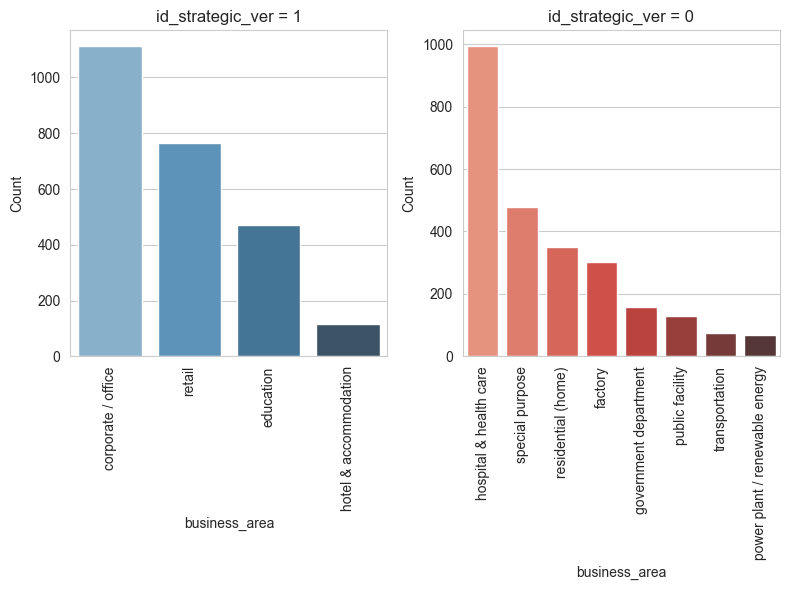

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['customer_type'] == 'End-user']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_ver_cus_1 = df_train_id[df_train_id['ver_cus'] == 1]
df_train_ver_cus_0 = df_train_id[df_train_id['ver_cus'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_ver_cus_1 = df_train_ver_cus_1['business_area'].value_counts()
count_ver_cus_0 = df_train_ver_cus_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_ver_cus_1.index, y=count_ver_cus_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_ver_cus_0.index, y=count_ver_cus_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


#### 23. ver_pro

특정 Vertical Level 1(사업영역) 이면서   
특정 Product Category(제품 유형)인   
경우에 대한 가중치

In [74]:
df_train['ver_pro'].value_counts()

ver_pro
0    56286
1     3013
Name: count, dtype: int64

In [75]:
df_train['product_category'].value_counts()

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64

In [76]:
find_ver_pro = df_train[df_train['ver_pro'] == 1]
find_ver_pro['product_category'].value_counts()

product_category
Digital Signage    2737
TV and Display      273
Others                3
Name: count, dtype: int64

In [77]:
find_ver_pro_test = df_test[df_test['ver_pro'] == 1]
find_ver_pro_test['product_category'].value_counts()

product_category
Digital Signage    334
TV and Display      95
Name: count, dtype: int64

product_category에서 Digital Signage, TV and Display 영역과 관련있음을 알수 있음

In [78]:
DS = find_ver_pro[find_ver_pro['product_category'] == 'Digital Signage']

In [79]:
DS['business_area'].value_counts()

business_area
corporate / office    1557
retail                1180
Name: count, dtype: int64

In [80]:
TD = find_ver_pro[find_ver_pro['product_category'] == 'TV and Display']

In [81]:
TD['business_area'].value_counts()

business_area
hotel & accommodation    259
corporate / office         8
retail                     6
Name: count, dtype: int64

In [82]:
find_ver_pro = df_train[df_train['ver_pro'] == 1]
find_ver_pro['business_area'].value_counts()

business_area
corporate / office       1566
retail                   1188
hotel & accommodation     259
Name: count, dtype: int64

In [83]:
find_ver_pro = df_test[df_test['ver_pro'] == 1]
find_ver_pro['business_area'].value_counts()

business_area
corporate / office       201
retail                   133
hotel & accommodation     95
Name: count, dtype: int64

business_area에서 'corporate / office', 'retail', 'hotel & accommodation' 영역과 관련있음을 알수 있음

#### 24. ver_win_rate_x

전체 Lead 중에서 Vertical을 기준으로  
[a] Vertical 수 비율  
[b] Vertical 별 Lead 수 대비 영업 전환 성공 비율 값[a] , [b] 를 곱한 값

In [84]:
df_train['ver_win_rate_x'].value_counts()

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64

#### 25. ver_win_ratio_per_bu

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

In [85]:
df_train['ver_win_ratio_per_bu'].value_counts()

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64

#### 26. business_area

고객의 사업 영역

In [86]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

#### 27. business_subarea

고객의 세부 사업 영역

In [87]:
df_train['business_subarea'].value_counts()

business_subarea
Others                           1740
Other Stores                      280
Hospital                          267
Manufacturing Factory / Plant     196
Construction                      191
                                 ... 
Duty Free Shop                      2
Dormitory                           1
Casino Resort                       1
Holdings                            1
Travel Agency                       1
Name: count, Length: 86, dtype: int64

#### 28. lead_owner

영업 담당자 이름

In [88]:
df_train['lead_owner'].value_counts()

lead_owner
174    4627
175    4120
97     2499
23     2453
194    2208
       ... 
481       1
909       1
979       1
111       1
756       1
Name: count, Length: 984, dtype: int64

#### 29. is_converted (Target)

영업 성공 여부 
True일 시 성공 (True or False 값을 가짐)

In [89]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [90]:
# # 두 변수 간에 값이 같은지 비교하여 차이가 나는 행을 식별합니다.
# df_train['diff_country'] = df_train['customer_country'] == df_train['customer_country.1']

# # 결과 확인
# df_train['diff_country'].value_counts()

In [91]:
# sns.pairplot(df_train, hue = "is_converted")

### 레이블 인코딩

In [92]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


### 상관관계 히트맵

In [93]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  int32  
 2   business_unit            59299 non-null  int32  
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  int32  
 6   enterprise               59299 non-null  int32  
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  int32  
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  int32  
 14  product_category      

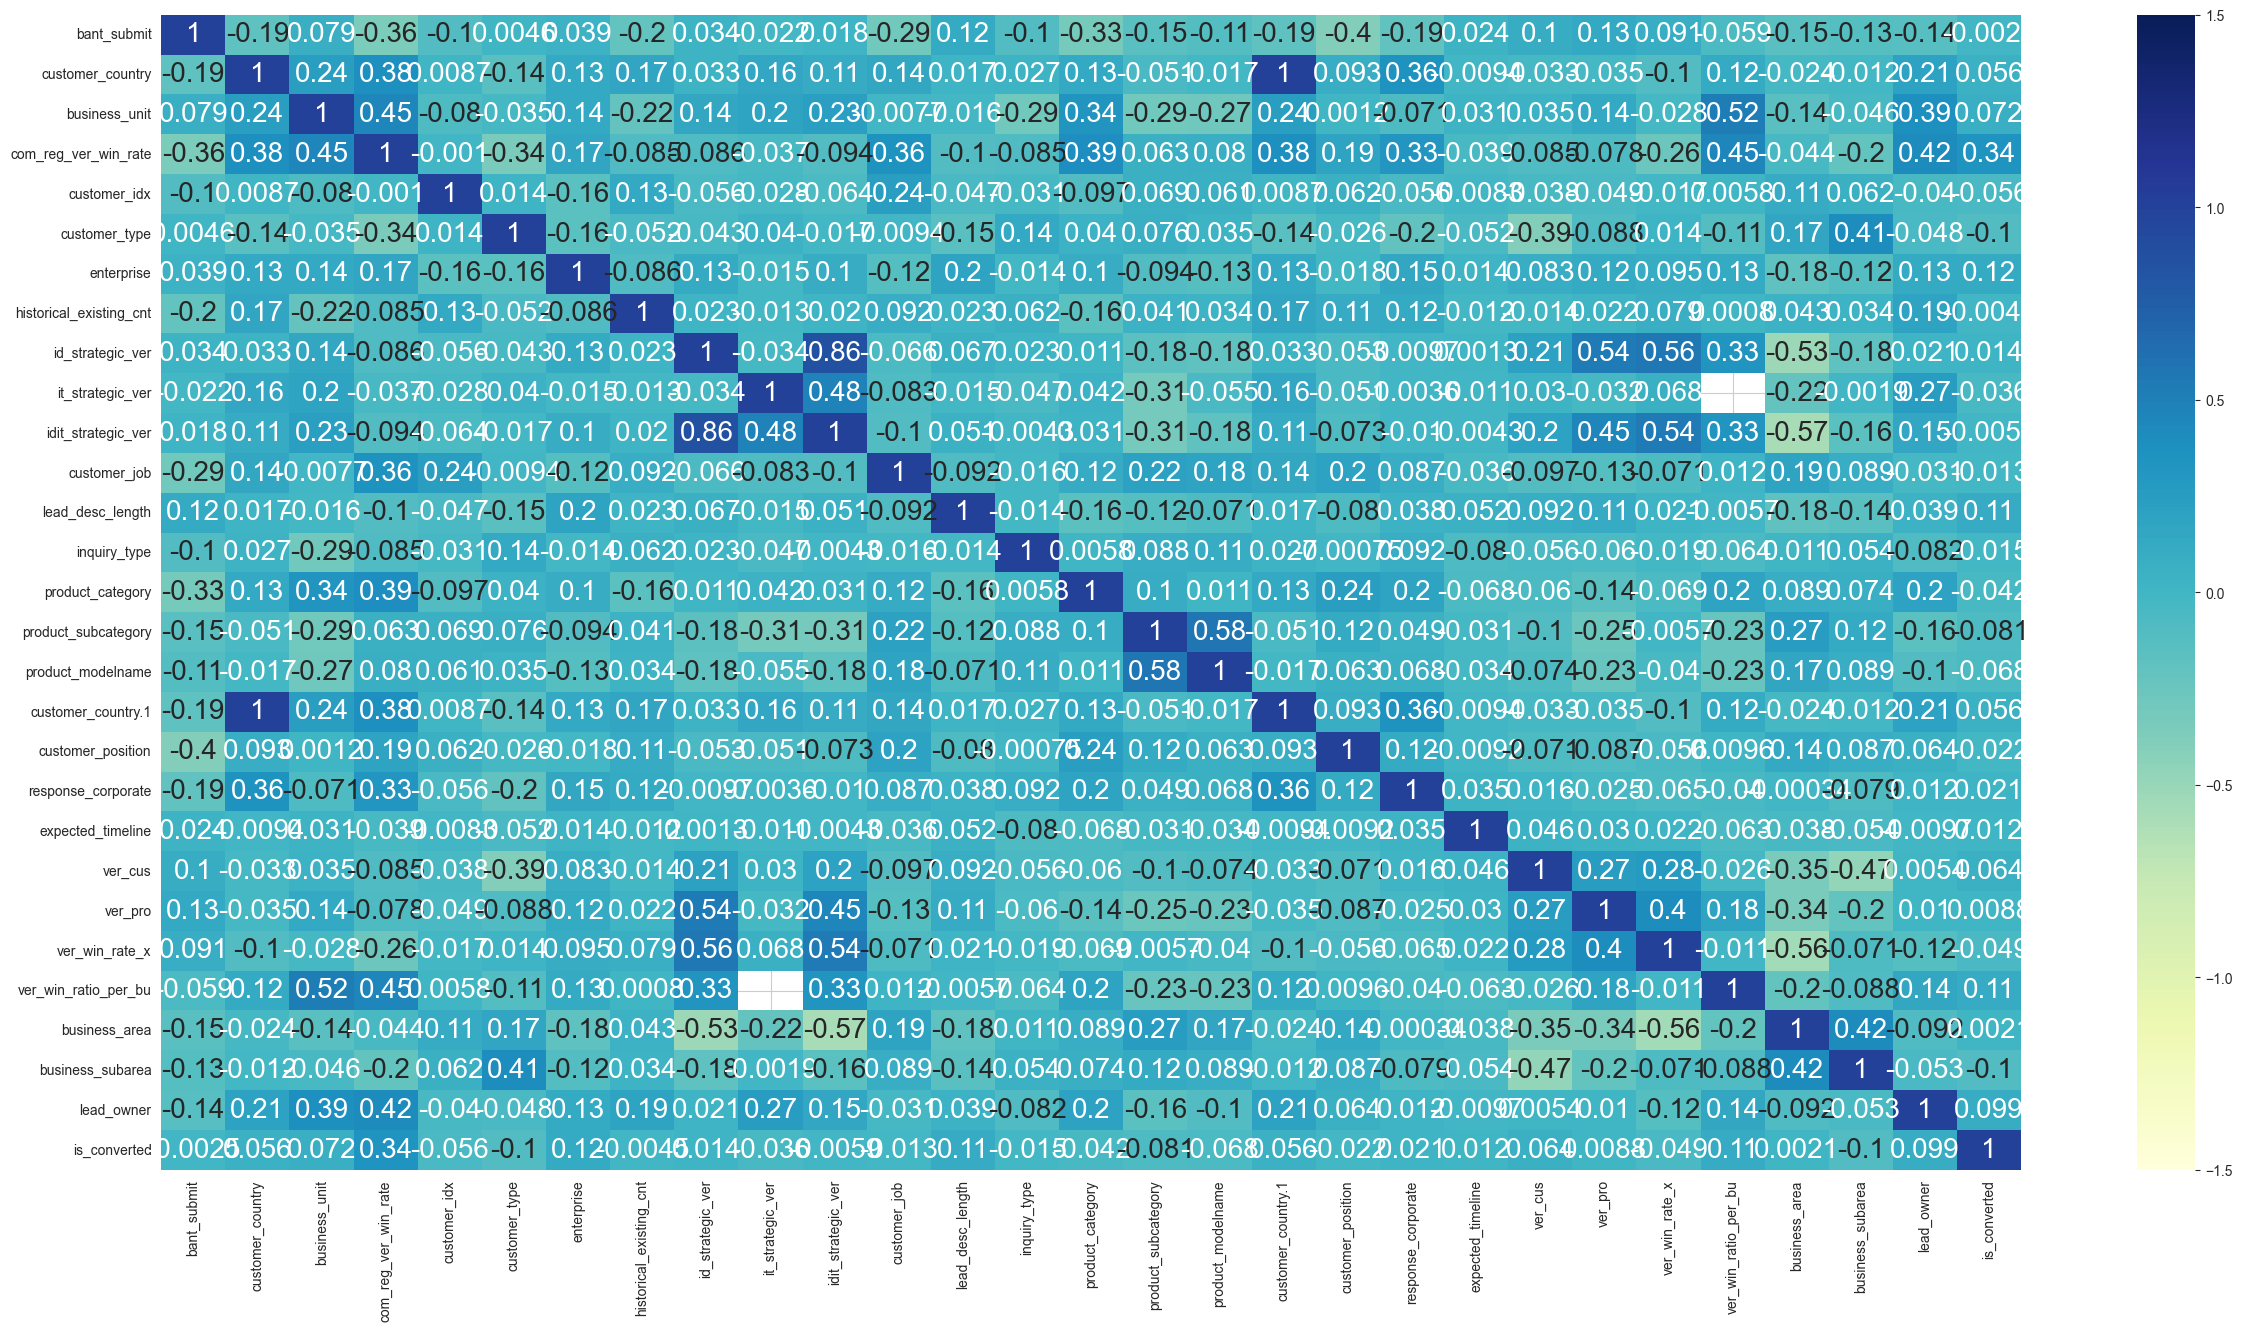

In [94]:
# 숫자형 변수들 간의 상관관계를 계산합니다.
corr = df_train_encoded.corr()

# 히트맵을 그립니다.
plt.figure(figsize=(30, 15))

sns.heatmap(corr,
            annot=True, # 수치표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='YlGnBu', # 색상
            vmin=-1.5, # 색상 팔레트의 범위
            vmax=1.5)
plt.show()


In [95]:
# df_train_encoded = df_train_encoded.drop(['customer_country.1'], axis=1)
# df_test_encoded = df_test_encoded.drop(['customer_country.1'], axis=1)

다시 학습 데이터와 제출 데이터를 분리합니다.

In [96]:
# # 학습 데이터와 제출 데이터를 다시 분리합니다.
# df_train_final = df_train_encoded.iloc[:len(df_train)]
# df_test_final = df_test_encoded.iloc[len(df_train):]

### 2-2. 학습, 검증 데이터 분리

In [97]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_encoded.drop("is_converted", axis=1),
    df_train_encoded["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [98]:
from lightgbm import LGBMClassifier

# LightGBM 
model = LGBMClassifier(
    num_leaves=70,
    max_depth=20,
    n_estimators=750,
    learning_rate=0.01,
    min_child_samples=20,
    verbose = -1
)

In [99]:
# from sklearn.tree import DecisionTreeClassifier

# # DecisionTree
# model = DecisionTreeClassifier(
#     max_depth=20,
#     min_samples_split=50,  # 노드를 분할하기 위한 최소 샘플 수
#     min_samples_leaf=2,  # 리프 노드에 필요한 최소 샘플 수
# )  

### 모델 학습

In [100]:
model.fit(x_train.fillna(0), y_train)

LGBMClassifier(learning_rate=0.01, max_depth=20, n_estimators=750,
               num_leaves=70, verbose=-1)

### 모델 성능 보기

In [101]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [102]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  680   267]
 [   61 10852]]

정확도: 0.9723
정밀도: 0.9177
재현율: 0.7181
F1: 0.8057


## 4. 제출하기

### 테스트 데이터 예측

In [103]:
# 예측에 필요한 데이터 분리
x_test = df_test_encoded.drop(["is_converted", "id"], axis=1)

In [104]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

575

### 제출 파일 작성

In [105]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver2.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**